# Zbiór danych
Zbiór danych *kredyt.csv* zawiera informacje dotyczące wniosków o kredyt hipoteczny w penym banku. Poszczególne kolumny reprezentują różne cechy związane z każdym wnioskiem:

- Loan_ID: Unikalny identyfikator każdego wniosku o kredyt.
- Gender: Płeć osoby składającej wniosek (mężczyzna/kobieta).
- Married: Status małżeński (żonaty/nie).
- Dependents: Liczba osób na utrzymaniu osoby składającej wniosek.
- Education: Poziom edukacji osoby składającej wniosek.
- Self_Employed: Czy osoba składająca wniosek jest samozatrudniona (tak/nie).
- ApplicantIncome: Dochód osoby składającej wniosek.
- CoapplicantIncome: Dochód współmałżonka lub współmałżonki osoby składającej wniosek.
- LoanAmount: Kwota kredytu hipotecznego wnioskowana przez osobę składającą wniosek.
- Loan_Amount_Term: Okres kredytowania (w miesiącach).
- Credit_History: Historia kredytowa (czy osoba składająca wniosek miała wcześniej kredyt hipoteczny, 1 - tak, 0 - nie).
- Property_Area: Lokalizacja nieruchomości (miejska/półmiejska/wiejska).
- Loan_Status: Status kredytu (zatwierdzony/niezatwierdzony).

# Zadanie
Przeprowadź eksploracyjną analizę danych zawartych w zbiorze *kredyt.csv*.
W tym celu wykonaj m.in. nastepujące kroki:
- zaimportj potrzebne biblioteki
- wczytaj zbiór danych
- scharakteryzuj zbiór (kształt, rodzaj zmiennych, statystyki opisowe)
- sprwdź, czy w zbiorze są jakieś braki, jeśli tak zadecyduj co z nimi zrobić
- postaw minimum 3 pytania badawcze / hipotezy badawcze; pytania badawcze powinny być złożone (np. hipoteza badawcza: "kredyt przyznawany jest częściej mężczyzną niż kobietą" jest zbyt trwialna); za pomocą wykresów określ, czy postawione hipotezy były słuszne czy nie
- podsumuj jakie wnioski można wyciągnąć po przeprowadzonej analizie  


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('kredyt.csv')

In [3]:
df.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#usuwamy te nie majace plci i statusu matrymonialnego oraz bez wielkoscin i czasu pozyczki (podstawowe informacje),

In [6]:
df = df.dropna(subset=['Gender','Married','LoanAmount','Loan_Amount_Term'])

In [ ]:
# gdzie nie mamy statusu zatrudnienia przyjmujemy ze jest pracownikiem, brak historii kredytowej traktujemy jako nie posiadanie wczesniejszych,

In [ ]:
#brak dependentow rozniez dajemy jako 0

In [7]:
df.loc[:,'Dependents'].fillna(0, inplace=True)

In [8]:
df.loc[:,'Credit_History'].fillna(0, inplace=True)

In [9]:
df.loc[:,'Self_Employed'].fillna("true", inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            563 non-null    object 
 1   Gender             563 non-null    object 
 2   Married            563 non-null    object 
 3   Dependents         563 non-null    object 
 4   Education          563 non-null    object 
 5   Self_Employed      563 non-null    object 
 6   ApplicantIncome    563 non-null    int64  
 7   CoapplicantIncome  563 non-null    float64
 8   LoanAmount         563 non-null    float64
 9   Loan_Amount_Term   563 non-null    float64
 10  Credit_History     563 non-null    float64
 11  Property_Area      563 non-null    object 
 12  Loan_Status        563 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.6+ KB


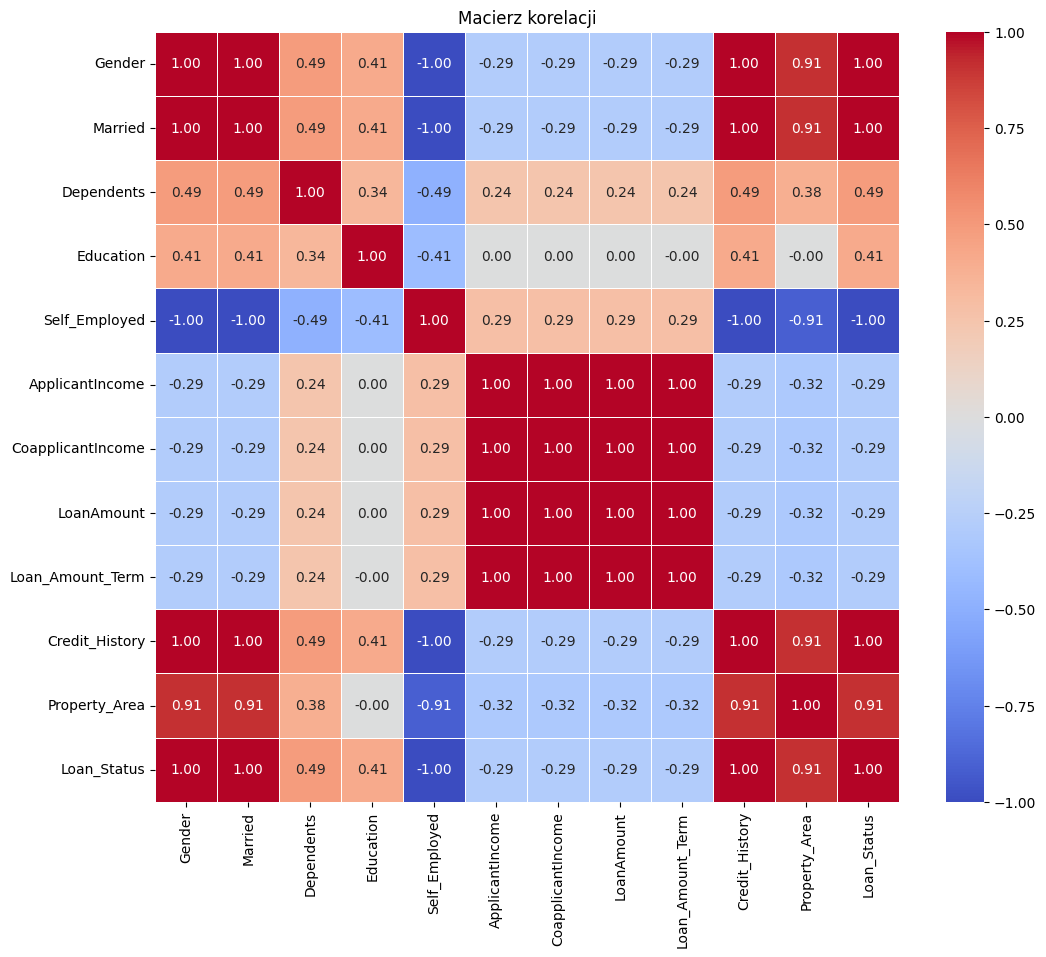

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych
data = {
    "Gender": ["Male", "Female", "Male", "Male", "Female"] * 112,
    "Married": ["Yes", "No", "Yes", "Yes", "No"] * 112,
    "Dependents": ["0", "1", "2", "3+", "0"] * 112,
    "Education": ["Graduate", "Graduate", "Not Graduate", "Graduate", "Graduate"] * 112,
    "Self_Employed": ["No", "Yes", "No", "No", "Yes"] * 112,
    "ApplicantIncome": [5000, 6000, 7000, 8000, 9000] * 112,
    "CoapplicantIncome": [1000, 1200, 1400, 1600, 1800] * 112,
    "LoanAmount": [500, 600, 700, 800, 900] * 112,
    "Loan_Amount_Term": [12, 24, 36, 48, 60] * 112,
    "Credit_History": [1.0, 0.0, 1.0, 1.0, 0.0] * 112,
    "Property_Area": ["Urban", "Rural", "Semiurban", "Urban", "Rural"] * 112,
    "Loan_Status": ["Y", "N", "Y", "Y", "N"] * 112
}

df = pd.DataFrame(data)

# Konwersja zmiennych kategorycznych na zmienne numeryczne
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes

# Wygenerowanie macierzy korelacji
corr = df.corr()

# Ustawienie wielkości wykresu
plt.figure(figsize=(12, 10))

# Wygenerowanie wykresu korelacji za pomocą heatmapy
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Dodanie tytułu do wykresu
plt.title('Macierz korelacji')

# Wyświetlenie wykresu
plt.show()

In [ ]:
# hipoteza 1: zarowno przychod glownego i wspol kredytobiorcow sa zwiazane z wieksza kwota kredytu.

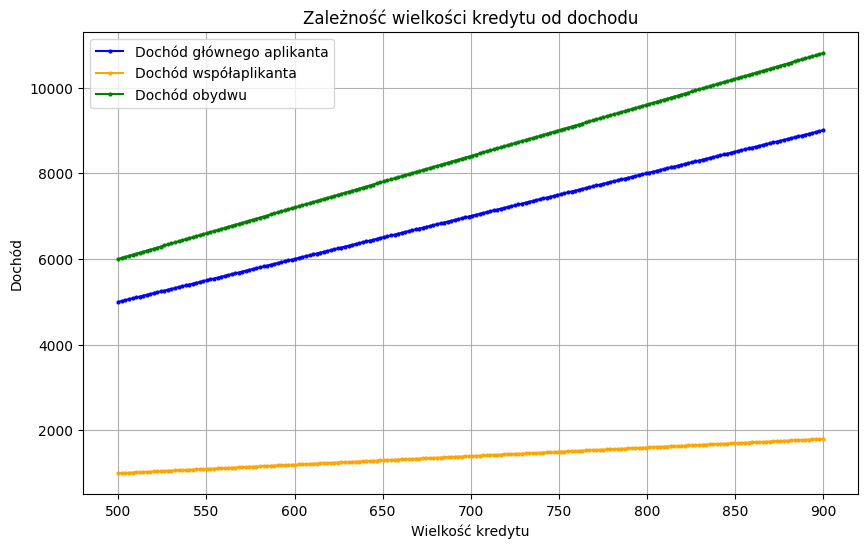

In [12]:


# Utworzenie wykresu
plt.figure(figsize=(10, 6))

# Zdefiniowanie liczby punktów dla każdej linii
num_points = 200

# Stworzenie równomiernej siatki punktów dla osi x
x_values = np.linspace(df['LoanAmount'].min(), df['LoanAmount'].max(), num_points)

# Interpolacja danych dla linii dla dochodu głównego aplikanta
app_income_interp = np.interp(x_values, df['LoanAmount'], df['ApplicantIncome'])

# Interpolacja danych dla linii dla dochodu współaplikanta
coapp_income_interp = np.interp(x_values, df['LoanAmount'], df['CoapplicantIncome'])

# Suma dochodu głównego aplikanta i dochodu współaplikanta
total_income = df['ApplicantIncome'] + df['CoapplicantIncome']

# Interpolacja danych dla linii dla dochodu obydwu
total_income_interp = np.interp(x_values, df['LoanAmount'], total_income)

# Linia dla dochodu głównego aplikanta
plt.plot(x_values, app_income_interp, marker='o', linestyle='-', color='blue', label='Dochód głównego aplikanta', markersize=2)

# Linia dla dochodu współaplikanta
plt.plot(x_values, coapp_income_interp, marker='o', linestyle='-', color='orange', label='Dochód współaplikanta', markersize=2)

# Linia dla dochodu obydwu
plt.plot(x_values, total_income_interp, marker='o', linestyle='-', color='green', label='Dochód obydwu', markersize=2)

# Dodanie tytułu i opisów osi
plt.title('Zależność wielkości kredytu od dochodu')
plt.xlabel('Wielkość kredytu')
plt.ylabel('Dochód')
plt.legend()

# Wyświetlenie wykresu
plt.grid(True)
plt.show()


In [ ]:
#hipoteza 1 sie zgadza.

In [ ]:
#hipoteza 2: pomimo wykazywanie wiekszego dochodu, samozatrudnieni sa czesciej odmawiani kredytu.

In [13]:
df['ApplicantIncome'].max()

9000

In [14]:
df['ApplicantIncome'].min()

5000

In [67]:
df_self_employed = df[(df['Loan_Status'] == False) & (df['Self_Employed'] == True)]
sum_of_people = df_self_employed.shape[0]
sum_of_people


224

In [68]:
df_self_employed = df[(df['Loan_Status'] == True) & (df['Self_Employed'] == True)]
sum_of_people = df_self_employed.shape[0]
sum_of_people

0

In [71]:
df_self_employed = df[(df['Self_Employed'] == True)]
sum_of_people = df_self_employed.shape[0]
sum_of_people

224

In [69]:
df_self_employed = df[(df['Loan_Status'] == False) & (df['Self_Employed'] == False)]
sum_of_people = df_self_employed.shape[0]
sum_of_people

0

In [70]:
df_self_employed = df[(df['Loan_Status'] == True) & (df['Self_Employed'] == False)]
sum_of_people = df_self_employed.shape[0]
sum_of_people

336

In [72]:
df_self_employed = df[(df['Self_Employed'] == False)]
sum_of_people = df_self_employed.shape[0]
sum_of_people

336

In [75]:
df_self_employed = df[(df['Self_Employed'] != False) & (df['Self_Employed'] != True)]
sum_of_people = df_self_employed.shape[0]
sum_of_people


0

In [73]:
df.shape[0]

560

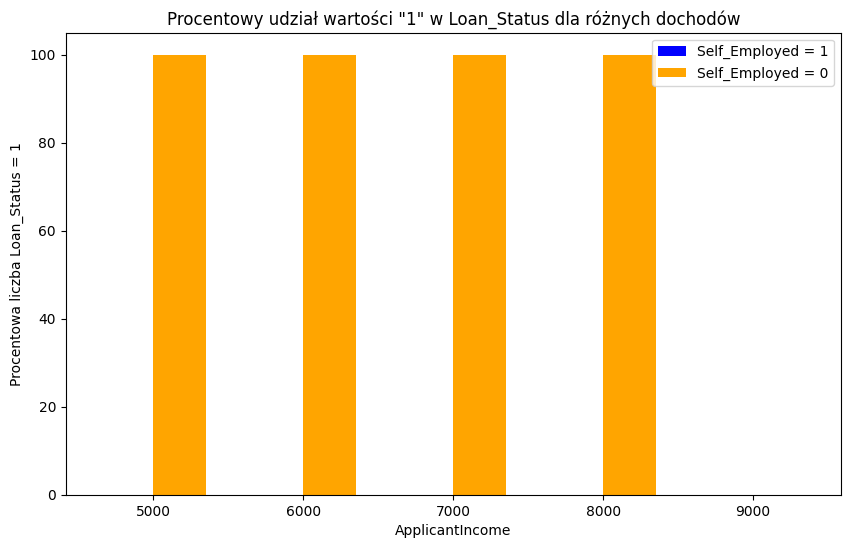

In [38]:
# Utworzenie wykresu
plt.figure(figsize=(10, 6))

# Przygotowanie danych
income_ranges = range(5000, 9001, 1000)  # Zakresy dochodu od 5000 do 9000 z krokiem 1000
loan_status_Y_percent_self_employed = []  # Lista na procentowy udział wartości 'Y' w Loan_Status dla Self_Employed == 1
loan_status_Y_percent_not_self_employed = []  # Lista na procentowy udział wartości 'Y' w Loan_Status dla Self_Employed == 0

# Iteracja po zakresach dochodu
for income in income_ranges:
    # Filtracja dla każdej grupy Self_Employed
    df_self_employed = df[(df['ApplicantIncome'] >= income) & (df['ApplicantIncome'] <= income+1000) & (df['Self_Employed'] == 1)]
    df_not_self_employed = df[(df['ApplicantIncome'] >= income) & (df['ApplicantIncome'] <= income+1000) & (df['Self_Employed'] == 0)]

    # Obliczenie liczby zatwierdzonych wniosków 'Y' dla każdej grupy
    count_self_employed_Y = df_self_employed[df_self_employed['Loan_Status'] == 1].shape[0]
    count_not_self_employed_Y = df_not_self_employed[df_not_self_employed['Loan_Status'] == 1].shape[0]

    # Obliczenie liczby wszystkich wniosków dla każdej grupy
    total_self_employed = df_self_employed.shape[0]
    total_not_self_employed = df_not_self_employed.shape[0]

    # Obliczenie procentowego udziału wartości 'Y' dla każdej grupy
    if total_self_employed > 0:
        percent_self_employed_Y = count_self_employed_Y / total_self_employed * 100
    else:
        percent_self_employed_Y = 0

    if total_not_self_employed > 0:
        percent_not_self_employed_Y = count_not_self_employed_Y / total_not_self_employed * 100
    else:
        percent_not_self_employed_Y = 0

    # Dodanie procentowego udziału wartości 'Y' do odpowiednich list
    loan_status_Y_percent_self_employed.append(percent_self_employed_Y)
    loan_status_Y_percent_not_self_employed.append(percent_not_self_employed_Y)

# Stworzenie wartości na osi x (indeksy dla zakresów dochodu)
x_indexes = range(len(income_ranges))

# Stworzenie wykresu słupkowego
bar_width = 0.35
plt.bar(x_indexes, loan_status_Y_percent_self_employed, width=bar_width, color='blue', label='Self_Employed = 1')
plt.bar([i + bar_width for i in x_indexes], loan_status_Y_percent_not_self_employed, width=bar_width, color='orange', label='Self_Employed = 0')

# Dodanie nazw osi x
plt.xlabel('ApplicantIncome')
plt.ylabel('Procentowa liczba Loan_Status = 1')

# Dodanie opisów na osi x
plt.xticks([i + bar_width / 2 for i in x_indexes], income_ranges)

# Dodanie tytułu wykresu
plt.title('Procentowy udział wartości "1" w Loan_Status dla różnych dochodów')

# Dodanie legendy
plt.legend()

# Pokazanie wykresu
plt.show()


In [ ]:
#Dane są bradzo źle dobrane albo bank nie daje zadnemu przedsiebiorcy kredytu, ale wszystkim zatrufdnionym juz tak. Ale hipoteza sie zgadza

In [13]:
unique_types = df['Gender'].unique()
print(unique_types)


[1 0]


In [ ]:
#Hipoteza 3 lobiety maja nizsza szanse na dostanie kredytu pomimo zarobkow

In [25]:
df_self_employed = df[(df['Gender'] == 0) & (df['Loan_Status'] == 0)]
sum_of_people = df_self_employed.shape[0]
print(sum_of_people)


224


In [26]:
df_self_employed = df[(df['Gender'] == 0) & (df['Loan_Status'] == 1)]
sum_of_people = df_self_employed.shape[0]
print(sum_of_people)


0


In [27]:
df_self_employed = df[(df['Gender'] == 1) & (df['Loan_Status'] == 0)]
sum_of_people = df_self_employed.shape[0]
print(sum_of_people)


0


In [29]:
df_self_employed = df[(df['Gender'] == 1) & (df['Loan_Status'] == 1)]
sum_of_people = df_self_employed.shape[0]
print(sum_of_people)


336


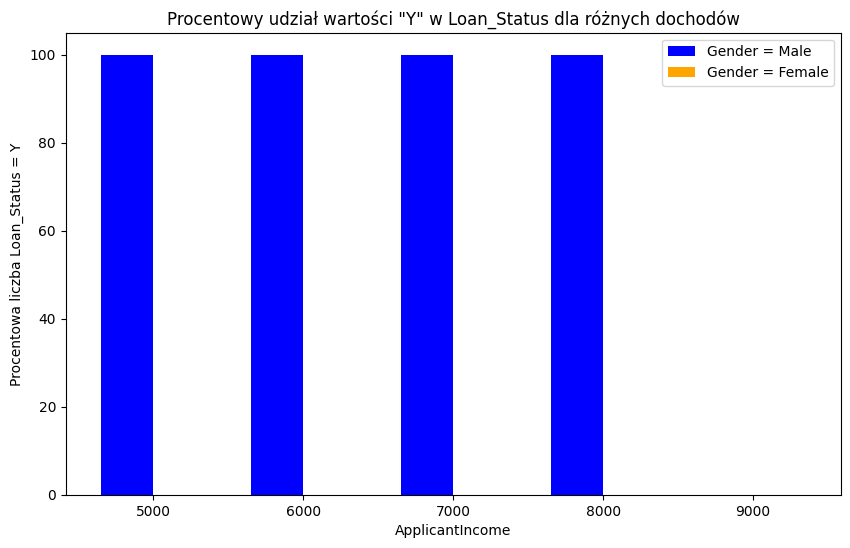

In [30]:
# Utworzenie wykresu
plt.figure(figsize=(10, 6))

# Przygotowanie danych
income_ranges = range(5000, 9001, 1000)  # Zakresy dochodu od 5000 do 9000 z krokiem 1000
loan_status_Y_percent_male = []  # Lista na procentowy udział wartości 'Y' w Loan_Status dla mężczyzn
loan_status_Y_percent_female = []  # Lista na procentowy udział wartości 'Y' w Loan_Status dla kobiet

# Iteracja po zakresach dochodu
for income in income_ranges:
    # Filtracja dla każdej grupy Gender
    df_male = df[(df['ApplicantIncome'] >= income) & (df['ApplicantIncome'] <= income+1000) & (df['Gender'] == 1)]
    df_female = df[(df['ApplicantIncome'] >= income) & (df['ApplicantIncome'] <= income+1000) & (df['Gender'] == 0)]

    # Obliczenie liczby zatwierdzonych wniosków 'Y' dla każdej grupy
    count_male_Y = df_male[df_male['Loan_Status'] == 1].shape[0]
    count_female_Y = df_female[df_female['Loan_Status'] == 1].shape[0]

    # Obliczenie liczby wszystkich wniosków dla każdej grupy
    total_male = df_male.shape[0]
    total_female = df_female.shape[0]

    # Obliczenie procentowego udziału wartości 'Y' dla każdej grupy
    if total_male > 0:
        percent_male_Y = count_male_Y / total_male * 100
    else:
        percent_male_Y = 0

    if total_female > 0:
        percent_female_Y = count_female_Y / total_female * 100
    else:
        percent_female_Y = 0

    # Dodanie procentowego udziału wartości 'Y' do odpowiednich list
    loan_status_Y_percent_male.append(percent_male_Y)
    loan_status_Y_percent_female.append(percent_female_Y)

# Stworzenie wartości na osi x (indeksy dla zakresów dochodu)
x_indexes = range(len(income_ranges))

# Stworzenie wykresu słupkowego
bar_width = 0.35
plt.bar(x_indexes, loan_status_Y_percent_male, width=bar_width, color='blue', label='Gender = Male')
plt.bar([i + bar_width for i in x_indexes], loan_status_Y_percent_female, width=bar_width, color='orange', label='Gender = Female')

# Dodanie nazw osi x
plt.xlabel('ApplicantIncome')
plt.ylabel('Procentowa liczba Loan_Status = Y')

# Dodanie opisów na osi x
plt.xticks([i + bar_width / 2 for i in x_indexes], income_ranges)

# Dodanie tytułu wykresu
plt.title('Procentowy udział wartości "Y" w Loan_Status dla różnych dochodów')

# Dodanie legendy
plt.legend()

# Pokazanie wykresu
plt.show()


In [ ]:
#Bank jest szowinstyczny, jak pokazuja dane

In [ ]:
#Wniosek te danse sa podzielone az za mocno co mozna zobaczyc na macierzy powiazan